In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('E-com_Data.csv')
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
data.shape

(541116, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
data.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [6]:
data.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [7]:
print(data.isnull().sum()/len(data)*100)

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64


In [8]:
data.duplicated().sum()

3145

In [9]:
data = data.rename(columns = {'InvoieNo' : 'InvoiceNo',
                             'Date of purchase' : 'Date'})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoiceNo          537979 non-null  float64
 3   Date               537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [11]:
data = data.drop_duplicates(ignore_index = True)

In [12]:
data.isnull().sum()

CustomerID           133790
Item Code                 1
InvoiceNo                 1
Date                      1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [13]:
# drop missing customerId

data = data.dropna(subset =['CustomerID'])

In [14]:
data.isnull().sum()

CustomerID                0
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
data.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [17]:
data['Date1'] = data['Date']

In [18]:
data.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date1
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


In [19]:
data['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [20]:
import datetime as dt

latest_date = dt.datetime(2017,12,20)

In [21]:
RFMScores = data.groupby('CustomerID').agg({'Date1' : lambda x : (latest_date - x.max()).days,
                                           'Date' : lambda x : x.nunique(),
                                           'Price' : lambda x : x.sum()})

# Convert invoice data into int
RFMScores['data'] = RFMScores['Date'].astype(int)

# Rename columns as recency , Frequency , Monetory
RFMScores.rename(columns = {'Date1' : 'Recency' , 'Date' : 'Frequency' , 'Price' : 'Monetary'} , inplace = True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,data
0,2.0,4,63,553704.0,63
1,3.0,77,18,257404.0,18
2,4.0,20,10,176613.0,10
3,5.0,18,7,41976.0,7
4,6.0,9,42,151822.0,42


In [22]:
RFMScores.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [23]:
RFMScores.Frequency.describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

In [24]:
RFMScores.Monetary.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

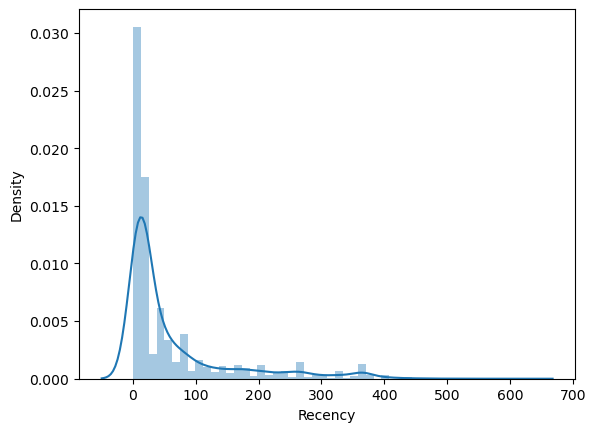

In [25]:
x= RFMScores['Recency']
ax = sns.distplot(x)

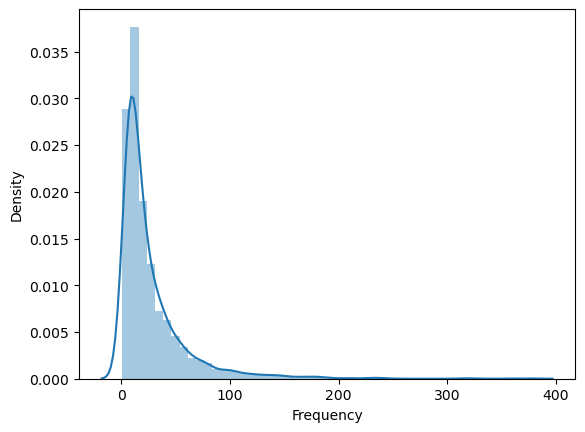

In [26]:
x= RFMScores['Frequency']
ax = sns.distplot(x)

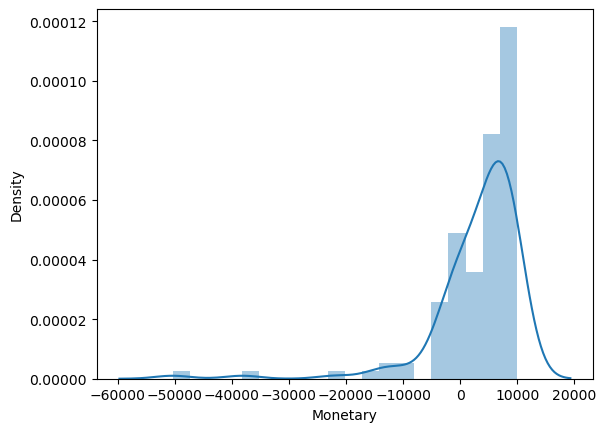

In [27]:
x= RFMScores.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x)

In [28]:
# split the data into 4 segment on the basis of quantile values

quantils = RFMScores.quantile(q = [0.25 , 0.5 , 0.75])
quantils = quantils.to_dict()

In [29]:
quantils

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0},
 'data': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0}}

In [30]:
# Function to create R, F, M segments

def RScores(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScores(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    

In [31]:
RFMScores['R'] = RFMScores['Recency'].apply(RScores , args = ('Recency' , quantils))
RFMScores['F'] = RFMScores['Frequency'].apply(FMScores , args = ('Frequency' , quantils))
RFMScores['M'] = RFMScores['Monetary'].apply(FMScores , args = ('Monetary' , quantils))
RFMScores.head()

,Recency,Frequency,Monetary,data,R,F,M
CustomerID,,,,,,,
2.0,4,63,553704.0,63,1,1,1
3.0,77,18,257404.0,18,4,2,1
4.0,20,10,176613.0,10,3,3,2
5.0,18,7,41976.0,7,2,4,3
6.0,9,42,151822.0,42,1,1,2


In [32]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)
RFMScores['RFMScores'] = RFMScores[['R' , 'F' , 'M']].sum(axis = 1)

RFMScores.head()

,Recency,Frequency,Monetary,data,R,F,M,RFMGroup,RFMScores
CustomerID,,,,,,,,,
2.0,4,63,553704.0,63,1,1,1,111,3
3.0,77,18,257404.0,18,4,2,1,421,7
4.0,20,10,176613.0,10,3,3,2,332,8
5.0,18,7,41976.0,7,2,4,3,243,9
6.0,9,42,151822.0,42,1,1,2,112,4


In [33]:
Loyalty_level = ['Diamond' , 'Platinum' , 'Gold' , 'Silver' , 'Bronze' , 'Iron']
score_cuts = pd.qcut(RFMScores.RFMScores , q=6 , labels =Loyalty_level)
RFMScores['RFM_Loyalty_level'] = score_cuts.values
RFMScores.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetary,data,R,F,M,RFMGroup,RFMScores,RFM_Loyalty_level
0,2.0,4,63,553704.0,63,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,18,4,2,1,421,7,Gold
2,4.0,20,10,176613.0,10,3,3,2,332,8,Gold
3,5.0,18,7,41976.0,7,2,4,3,243,9,Silver
4,6.0,9,42,151822.0,42,1,1,2,112,4,Diamond
5,7.0,208,4,9410.0,4,4,4,4,444,12,Iron
6,8.0,234,10,135550.0,10,4,3,2,432,9,Silver
7,9.0,15,7,65832.0,7,2,4,3,243,9,Silver
8,10.0,16,22,331601.0,22,2,2,1,221,5,Platinum
9,11.0,9,10,771439.0,10,1,3,1,131,5,Platinum


In [34]:
# Filter RFMGroup = 111
RFMScores[RFMScores['RFMGroup'] == '111'].sort_values('Monetary' , ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,data,R,F,M,RFMGroup,RFMScores,RFM_Loyalty_level
0,1704.0,3,235,35536194.0,235,1,1,1,111,3,Diamond
1,1896.0,2,356,17743855.0,356,1,1,1,111,3,Diamond
2,56.0,10,108,14357682.0,108,1,1,1,111,3,Diamond
3,1346.0,9,237,12647317.0,237,1,1,1,111,3,Diamond
4,3802.0,3,236,12319439.0,236,1,1,1,111,3,Diamond
5,4234.0,3,94,10654918.0,94,1,1,1,111,3,Diamond
6,1006.0,5,211,9351019.0,211,1,1,1,111,3,Diamond
7,3203.0,5,99,8102167.0,99,1,1,1,111,3,Diamond
8,2193.0,1,357,7966054.0,357,1,1,1,111,3,Diamond
9,1448.0,5,190,7892625.0,190,1,1,1,111,3,Diamond


In [35]:
RFMScores = RFMScores.reset_index()

In [36]:
RFMScores1 =RFMScores.iloc[:,0:4]

In [37]:
RFMScores1.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0


In [38]:
# Feature scaling
# from sklearn.preprocessing import StandardScaler

### K-Means Cluster

In [39]:
from sklearn.cluster import KMeans

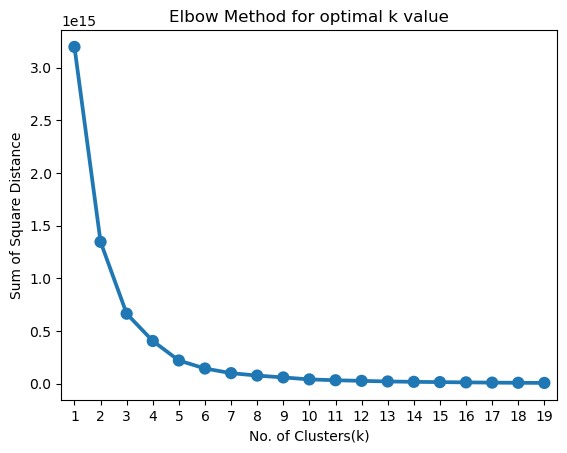

In [40]:
sum_of_square_distance = {}

for k in range(1,20):
    km = KMeans(n_clusters = k , init = 'k-means++' , max_iter = 500)
    km = km.fit(RFMScores1)
    sum_of_square_distance[k] =km.inertia_
    
sns.pointplot(x = list(sum_of_square_distance.keys()) , y = list(sum_of_square_distance.values()))
plt.xlabel("No. of Clusters(k)")
plt.ylabel("Sum of Square Distance")
plt.title("Elbow Method for optimal k value")
plt.show()

In [41]:
kmeans_cluster = KMeans(n_clusters = 6 , init = 'k-means++' , max_iter = 500)
kmeans_cluster.fit(RFMScores1)

KMeans(max_iter=500, n_clusters=6)

In [42]:
RFMScores['Cluster'] = kmeans_cluster.labels_
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,data,R,F,M,RFMGroup,RFMScores,RFM_Loyalty_level,Cluster
0,2.0,4,63,553704.0,63,1,1,1,111,3,Diamond,5
1,3.0,77,18,257404.0,18,4,2,1,421,7,Gold,0
2,4.0,20,10,176613.0,10,3,3,2,332,8,Gold,0
3,5.0,18,7,41976.0,7,2,4,3,243,9,Silver,0
4,6.0,9,42,151822.0,42,1,1,2,112,4,Diamond,0


In [43]:
os.getcwd()

'C:\\Users\\Ruchi Kumari\\Desktop\\Projects\\E_Commerce_Project'

In [44]:
RFMScores.to_csv('new_cluster_data.csv')